In [30]:
import cobra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import warnings
%load_ext autoreload


from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
model = cobra.io.read_sbml_model('data/iML1515.xml')
print(f'The biomass functions defined in the model are:\n{model.reactions.get_by_id("BIOMASS_Ec_iML1515_WT_75p37M")} \n{model.reactions.get_by_id("BIOMASS_Ec_iML1515_core_75p37M")}')

The biomass functions defined in the model are:
BIOMASS_Ec_iML1515_WT_75p37M: 0.000223 10fthf_c + 0.000223 2dmmql8_c + 2.5e-05 2fe2s_c + 0.000248 4fe4s_c + 0.000223 5mthf_c + 0.000279 accoa_c + 0.000223 adocbl_c + 0.499149 ala__L_c + 0.000223 amet_c + 0.28742 arg__L_c + 0.234232 asn__L_c + 0.234232 asp__L_c + 75.55223 atp_c + 2e-06 btn_c + 0.004952 ca2_c + 0.000223 chor_c + 0.004952 cl_c + 0.002944 clpn160_p + 0.00229 clpn161_p + 0.00118 clpn181_p + 0.000168 coa_c + 2.4e-05 cobalt2_c + 0.008151 colipa_e + 0.129799 ctp_c + 0.000674 cu2_c + 0.088988 cys__L_c + 0.024805 datp_c + 0.025612 dctp_c + 0.025612 dgtp_c + 0.024805 dttp_c + 0.000223 enter_c + 0.000223 fad_c + 0.006388 fe2_c + 0.007428 fe3_c + 0.255712 gln__L_c + 0.255712 glu__L_c + 0.595297 gly_c + 0.154187 glycogen_c + 0.000223 gthrd_c + 0.209121 gtp_c + 70.028756 h2o_c + 0.000223 hemeO_c + 0.092056 his__L_c + 0.282306 ile__L_c + 0.18569 k_c + 0.437778 leu__L_c + 3e-06 lipopb_c + 0.333448 lys__L_c + 3.1e-05 malcoa_c + 0.149336 me

In [32]:
df = pd.read_csv('data/pcbi.1008528.s002 - Biomasses_used.csv', skiprows=1).set_index('Unnamed: 0')
df

,10fthf[c],pydx5p[c],murein3px4p[p],thr__L[c],clpn161[p],gthrd[c],thmpp[c],ni2[c],mn2[c],mocogdp[c],...,dgtp[c],fad[c],succoa[c],->,h[c],adp[c],pi[c],ppi[c],GlucoseUptake,AmoniumUptake
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Class,cofactor,energy,carbohydrate,protein,lipid,protein,energy,ion,ion,DNA,...,DNA,energy,cofactor,NaN,energy,energy,energy,energy,NaN,NaN
MW,473.4393,245.127,1750.6741,119.119,1345.7824,306.316,422.292,58.692,54.937,737.535,...,573.1265,785.5497,862.57,NaN,1,424.179,95.98,174.953,NaN,NaN
WT,0.0001809369184,0.0001809369184,0.000490882671,0.2000123756,0.001858051763,0.0001809369184,0.0001809369184,0.0002490925289,0.0005338856157,0.00000567963421,...,0.0207809702,0.0001809369184,0.00007951487894,->,61.15927482,61.15927482,61.15602932,0.6808659529,-18.0,-18.0
Core,0.0002075503304,0.0002075503304,0,0.2361140956,0,0,0.0002075503304,0.0003006222275,0.0006431268086,0,...,0.02514523443,0.0002075503304,0.00009121045911,->,70.15498998,70.15498998,70.15126711,0.8241377417,-18.0,-18.0
Mean,0.0001942436244,0.0001942436244,0.0002454413355,0.2180632356,0.0009290258815,0.0000904684592,0.0001942436244,0.0002748573782,0.0005885062122,0.000002839817105,...,0.02296310231,0.0001942436244,0.00008536266902,->,65.6571324,65.6571324,65.65364821,0.7525018473,-18.0,-18.0
CarbStarv,0.0001403066433,0.00009353776217,0.00001181919527,0.1837641131,0.00005815825507,0.00007623869345,0.00002338444054,0.00007279646518,0.0001558669164,0.000001299134687,...,0.01050495917,0.00002338444054,0.0000616594217,->,7.904276465,7.904276465,7.903857013,0.3762509236,-0.5,-18.0
NitStarv,0.0003837216192,0.0002877912144,0.001818228532,0.02153882222,0.009176293858,0.000008935866945,0.0003837216192,0.0001357428314,0.0002906434604,0.00000154273936,...,0.01247477583,0.0003837216192,0.0001686310255,->,129.7034136,129.7034136,129.6965307,3.010007389,-18.0,-0.5


In [33]:
BOFs = {
    'UL': build_BOF(model, df, 'Mean', 'UL'),
    'CL': build_BOF(model, df, 'CarbStarv', 'CL'),
    'NL': build_BOF(model, df, 'NitStarv', 'NL'),
    }

# Adding biomass functions
for reaction in BOFs.values():
    model.add_reactions([reaction])

# Setting bounds of all biomasses to (0,0)
for biomass in list(BOFs.keys())+['BIOMASS_Ec_iML1515_core_75p37M', 'BIOMASS_Ec_iML1515_WT_75p37M']:
    model.reactions.get_by_id(biomass).bounds = (0,0)

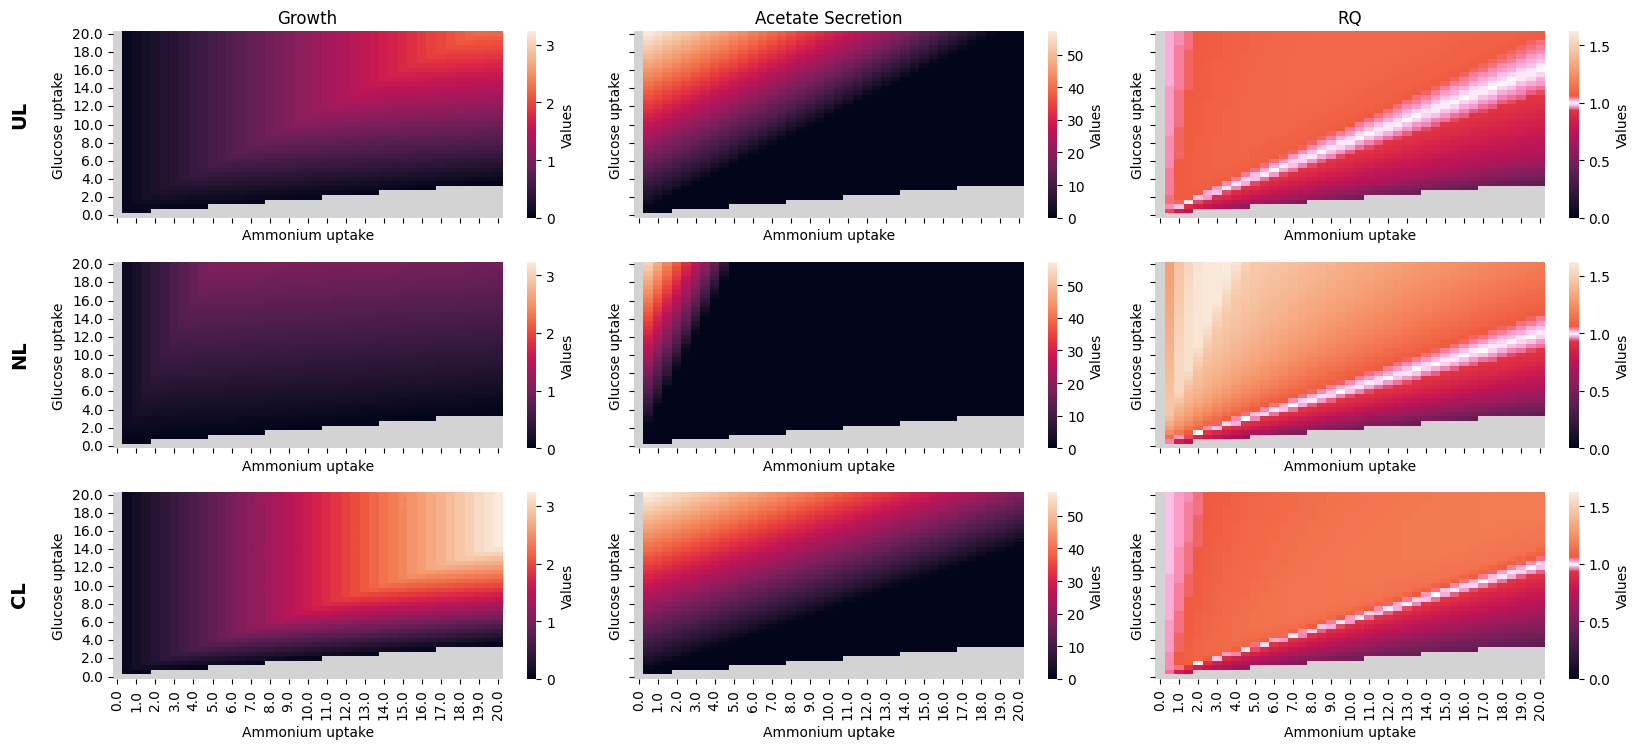

In [29]:
%autoreload 2
with warnings.catch_warnings():
    fig_1_df = pd.read_csv('figure_1_data_4040_v2.csv')
    warnings.simplefilter("ignore")
    fig_1_plot(fig_1_df)
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     fig_1_df = fig_1(model, res=41)
#     fig_1_df.to_csv('figure_1_data_4040_v2.csv')

In [18]:
df.drop(columns='Unnamed: 0').replace({'WT':'UL','NitStarv':'NL','CarbStarv':'CL'}).to_csv('figure_1_data_4040_v2.csv')

159
159
159


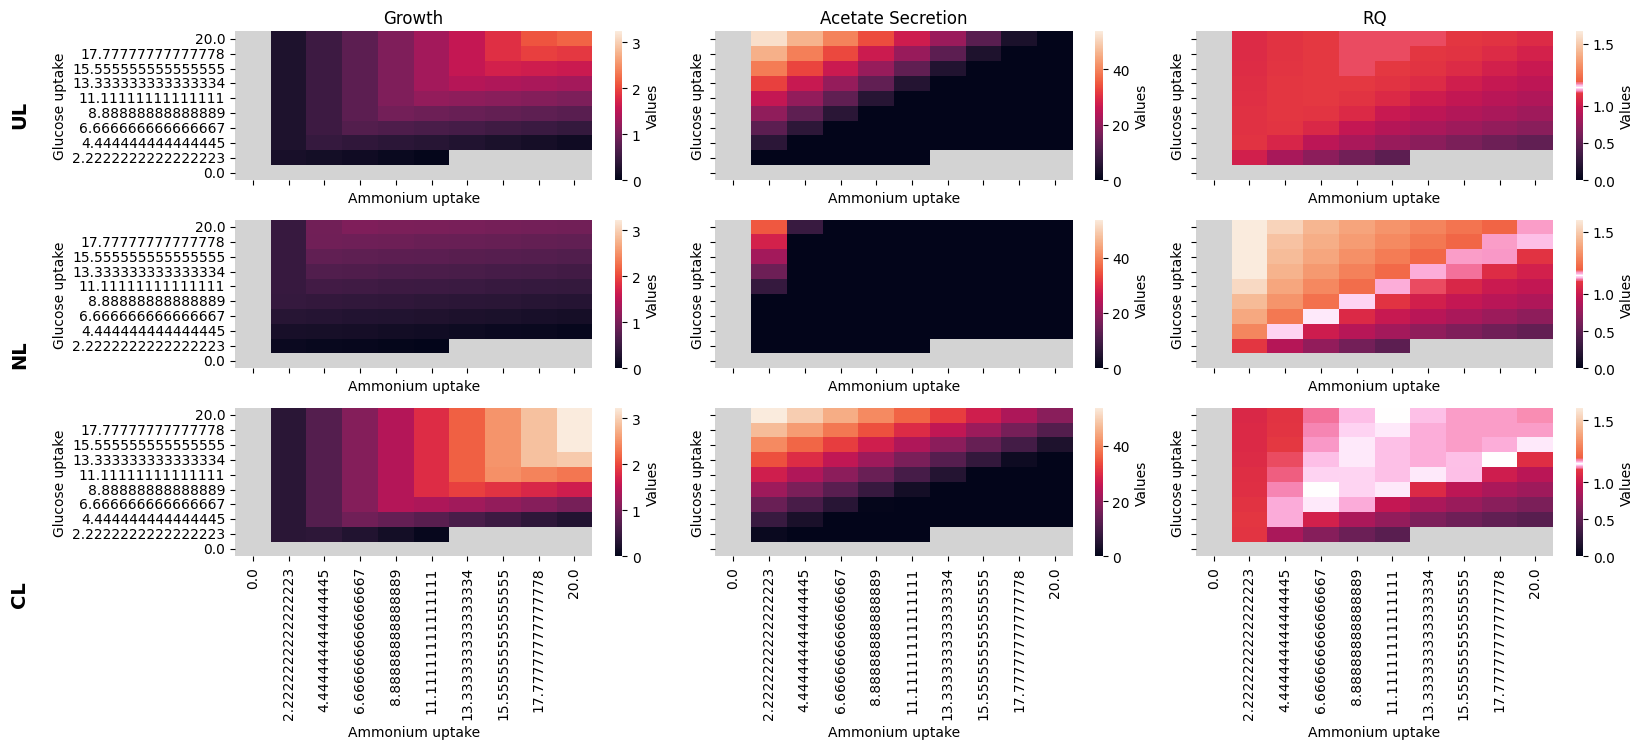

In [109]:
%autoreload 2
with warnings.catch_warnings():
    df = pd.read_csv('figure_1_data.csv')
    warnings.simplefilter("ignore")
    fig_1_plot(df)

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    BTW_df = BTW(model,BOFs = ['NL', 'CL'], res = 5)
    BTW_df.to_csv('figure_2_data.csv')

In [78]:
BTW_df.sort_values('Growth', ascending=False).drop_duplicates(['Glucose', 'Ammonium'], keep='first').reset_index(drop=True)

,BOF,Glucose,Ammonium,Growth,Acetate,RQ
0,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,15.0,20.0,3.231938,2.388840e+00,1.148674
1,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,20.0,3.231938,1.850450e+01,1.175191
2,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,15.0,2.423953,2.869015e+01,1.168433
3,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,15.0,15.0,2.423953,1.371582e+01,1.169324
4,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,10.0,15.0,2.240241,-8.896083e-13,1.136302
5,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,10.0,20.0,2.240241,1.791158e-14,1.136302
6,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,15.0,10.0,1.615969,2.383629e+01,1.154626
7,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,10.0,1.615969,3.850966e+01,1.141576
8,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,10.0,10.0,1.615969,8.926103e+00,1.158647
9,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,5.0,10.0,1.087649,-1.373221e-13,1.117429


In [11]:
for x,y in zip(np.linspace(0, 1, 11), 1-np.linspace(0, 1, 11)):
    print(f'{x} + {y} = {x+y}')

0.0 + 1.0 = 1.0
0.1 + 0.9 = 1.0
0.2 + 0.8 = 1.0
0.30000000000000004 + 0.7 = 1.0
0.4 + 0.6 = 1.0
0.5 + 0.5 = 1.0
0.6000000000000001 + 0.3999999999999999 = 1.0
0.7000000000000001 + 0.29999999999999993 = 1.0
0.8 + 0.19999999999999996 = 1.0
0.9 + 0.09999999999999998 = 1.0
1.0 + 0.0 = 1.0


In [14]:
%autoreload 2
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    BTW_df = BTW(model,BOFs = ['NL', 'CL'], res = 41)
    BTW_df.to_csv('figure_2_data.csv')

{<Reaction NL at 0x13aee7810>: 0.0, <Reaction CL at 0x13af1a210>: 1.0}
{<Reaction NL at 0x13aee7810>: 0.1, <Reaction CL at 0x13af1a210>: 0.9}
{<Reaction NL at 0x13aee7810>: 0.2, <Reaction CL at 0x13af1a210>: 0.8}
{<Reaction NL at 0x13aee7810>: 0.30000000000000004, <Reaction CL at 0x13af1a210>: 0.7}
{<Reaction NL at 0x13aee7810>: 0.4, <Reaction CL at 0x13af1a210>: 0.6}
{<Reaction NL at 0x13aee7810>: 0.5, <Reaction CL at 0x13af1a210>: 0.5}
{<Reaction NL at 0x13aee7810>: 0.6000000000000001, <Reaction CL at 0x13af1a210>: 0.3999999999999999}
{<Reaction NL at 0x13aee7810>: 0.7000000000000001, <Reaction CL at 0x13af1a210>: 0.29999999999999993}
{<Reaction NL at 0x13aee7810>: 0.8, <Reaction CL at 0x13af1a210>: 0.19999999999999996}
{<Reaction NL at 0x13aee7810>: 0.9, <Reaction CL at 0x13af1a210>: 0.09999999999999998}
{<Reaction NL at 0x13aee7810>: 1.0, <Reaction CL at 0x13af1a210>: 0.0}
{<Reaction NL at 0x13aee7810>: 0.0, <Reaction CL at 0x13af1a210>: 1.0}
{<Reaction NL at 0x13aee7810>: 0.1, <Re

In [37]:
BTW_df = pd.read_csv('/Users/guillaumebelissent/Docs/EPFL/MA/SB/ChE-411/figure_2_data_4040.csv', index_col=0)

In [38]:
BTW_df

,BOF,Glucose,Ammonium,Growth,Acetate,RQ
0,"{<Reaction NL at 0x13aee7810>: 0.0, <Reaction ...",0.0,0.0,0.000000,0.000000e+00,0.000000
1,"{<Reaction NL at 0x13aee7810>: 0.1, <Reaction ...",0.0,0.0,0.000000,0.000000e+00,0.000000
2,"{<Reaction NL at 0x13aee7810>: 0.2, <Reaction ...",0.0,0.0,0.000000,0.000000e+00,0.000000
3,{<Reaction NL at 0x13aee7810>: 0.3000000000000...,0.0,0.0,0.000000,0.000000e+00,0.000000
4,"{<Reaction NL at 0x13aee7810>: 0.4, <Reaction ...",0.0,0.0,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...
18486,{<Reaction NL at 0x13aee7810>: 0.6000000000000...,20.0,20.0,1.402414,0.000000e+00,0.000000
18487,{<Reaction NL at 0x13aee7810>: 0.7000000000000...,20.0,20.0,1.145241,4.684906e+00,1.167672
18488,"{<Reaction NL at 0x13aee7810>: 0.8, <Reaction ...",20.0,20.0,0.888068,1.225952e+01,1.118219
18489,"{<Reaction NL at 0x13aee7810>: 0.9, <Reaction ...",20.0,20.0,0.843050,1.064916e+01,1.132228


In [39]:
BTW_df_clean = BTW_df.sort_values('Growth', ascending=False).drop_duplicates(['Glucose', 'Ammonium'], keep='first').reset_index(drop=True)

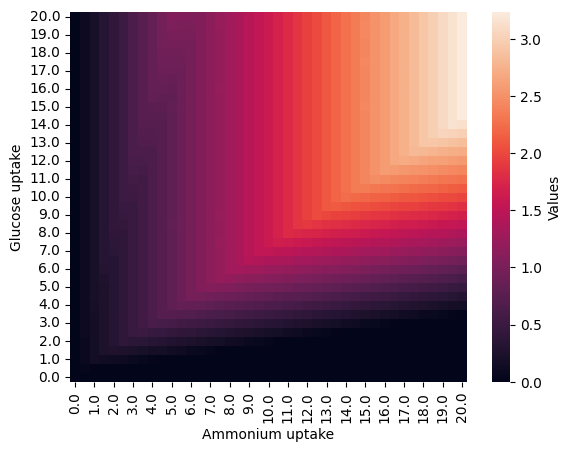

In [40]:
fig,ax = plt.subplots(1,1)
plot_heatmap(BTW_df_clean, ax=ax, metric='Growth')

In [64]:
weights_df=pd.DataFrame(columns=['Glucose','Ammonium','NL', 'CL'])
BTW_df_clean['BOF'] = BTW_df_clean['BOF'].astype(object)
for bof in BTW_df_clean['BOF']:
    bof=eval(bof.replace("<","'").replace(">","'"))
    print({key.split(' ')[1]:w for key, w in bof.items()})
    weights_df.loc[len(weights_df)] = {key.split(' ')[1]:w for key, w in bof.items()}
weights_df.loc[:,['Glucose','Ammonium']] = BTW_df_clean.loc[:,['Glucose','Ammonium']]
weights_df

{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0, 'CL': 1.0}
{'NL': 0.0,

,Glucose,Ammonium,NL,CL
0,14.5,20.0,0.0,1.0
1,19.0,20.0,0.0,1.0
2,15.0,20.0,0.0,1.0
3,16.5,20.0,0.0,1.0
4,18.0,20.0,0.0,1.0
...,...,...,...,...
1676,1.0,10.5,1.0,0.0
1677,2.5,17.0,0.0,1.0
1678,0.5,10.5,1.0,0.0
1679,0.0,10.5,0.8,0.2


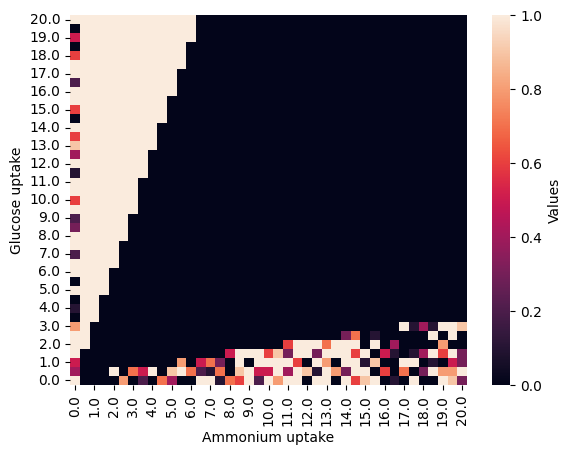

In [65]:
fig, ax=plt.subplots(1,1)
plot_heatmap(weights_df, ax, 'NL')

In [66]:
BTW_df_clean
for bof in BTW_df_clean['BOF']:
    bof=eval(bof.replace("<","'").replace(">","'"))

,BOF,Glucose,Ammonium,Growth,Acetate,RQ
0,"{<Reaction NL at 0x13aee7810>: 0.0, <Reaction ...",14.5,20.0,3.231938,0.663034,1.144254
1,"{<Reaction NL at 0x13aee7810>: 0.0, <Reaction ...",19.0,20.0,3.231938,15.457918,1.173896
2,"{<Reaction NL at 0x13aee7810>: 0.0, <Reaction ...",15.0,20.0,3.231938,2.388840,1.148674
3,"{<Reaction NL at 0x13aee7810>: 0.0, <Reaction ...",16.5,20.0,3.231938,7.521149,1.162625
4,"{<Reaction NL at 0x13aee7810>: 0.0, <Reaction ...",18.0,20.0,3.231938,12.410299,1.172592
...,...,...,...,...,...,...
1676,"{<Reaction NL at 0x13aee7810>: 1.0, <Reaction ...",1.0,10.5,0.000000,0.000000,0.000000
1677,"{<Reaction NL at 0x13aee7810>: 0.0, <Reaction ...",2.5,17.0,0.000000,0.000000,0.000000
1678,"{<Reaction NL at 0x13aee7810>: 1.0, <Reaction ...",0.5,10.5,0.000000,0.000000,0.000000
1679,"{<Reaction NL at 0x13aee7810>: 0.8, <Reaction ...",0.0,10.5,0.000000,0.000000,0.000000


In [28]:
UL_data = fig_1_df[fig_1_df['BOF'] == 'UL']

NameError: name 'fig_1_df' is not defined

In [65]:
UL_data

,Unnamed: 0,BOF,Glucose,Ammonium,Growth,Acetate,RQ
0,0,UL,0.0,0.0,0.000000,0.000000e+00,0.000000
1,1,UL,0.5,0.0,0.000000,0.000000e+00,0.000000
2,2,UL,1.0,0.0,0.000000,0.000000e+00,0.000000
3,3,UL,1.5,0.0,0.000000,0.000000e+00,0.000000
4,4,UL,2.0,0.0,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...,...
1676,1676,UL,18.0,20.0,1.921508,-7.911336e-14,1.033173
1677,1677,UL,18.5,20.0,1.985981,-3.955668e-13,1.041698
1678,1678,UL,19.0,20.0,2.050453,-1.898721e-13,1.049921
1679,1679,UL,19.5,20.0,2.114926,-5.379708e-13,1.057859


In [64]:
UL_data[(UL_data['Glucose'] == 10) & (UL_data['Ammonium'] == 10)]['Growth']

840    1.071271
Name: Growth, dtype: float64

In [27]:
BTW_df_clean['Relative Growth'] = BTW_df_clean['Growth']/UL_data['Growth']

NameError: name 'UL_data' is not defined

In [26]:
BTW_df_clean['Relative Growth']

KeyError: 'Relative Growth'

KeyError: 'Relative Growth'

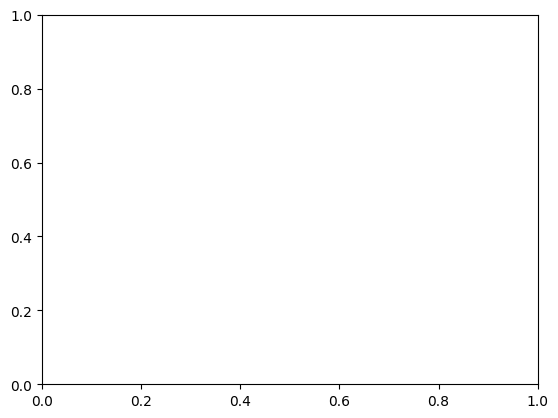

In [35]:
fig, ax=plt.subplots(1,1)
plot_heatmap(BTW_df_clean, ax=ax, metric = 'Relative Growth')

In [1]:
relative_growth = []
for gl, am in zip(BTW_df_clean['Glucose'].to_list(),BTW_df_clean['Ammonium'].to_list()):
    btw = BTW_df_clean[(BTW_df_clean['Glucose'] == gl) & (BTW_df_clean['Ammonium'] == am)]['Growth'][0]
    ul = UL_data[(UL_data['Glucose'] == gl) & (UL_data['Ammonium'] == am)]['Growth'].reset_index(drop=True)
    print(f'gl: {gl}, am: {am}, ul: {ul}, btw: {btw}')
    if ul == 0 and btw == 0:
        relative_growth.append(1)
    elif ul == 0:
         relative_growth.append(0)
    else:
        relative_growth.append(btw/ul)

NameError: name 'BTW_df_clean' is not defined

In [56]:

 for gl, am in zip(BTW_df_clean['Glucose'],BTW_df_clean['Ammonium'])]

[0      NaN
 1669   NaN
 Name: Growth, dtype: float64,
 1      NaN
 1678   NaN
 Name: Growth, dtype: float64,
 2      NaN
 1670   NaN
 Name: Growth, dtype: float64,
 3      NaN
 1673   NaN
 Name: Growth, dtype: float64,
 4      NaN
 1676   NaN
 Name: Growth, dtype: float64,
 5      NaN
 1675   NaN
 Name: Growth, dtype: float64,
 6      NaN
 1671   NaN
 Name: Growth, dtype: float64,
 7      NaN
 1677   NaN
 Name: Growth, dtype: float64,
 8      NaN
 1674   NaN
 Name: Growth, dtype: float64,
 9      NaN
 1679   NaN
 Name: Growth, dtype: float64,
 10     NaN
 1680   NaN
 Name: Growth, dtype: float64,
 11     NaN
 1672   NaN
 Name: Growth, dtype: float64,
 12     NaN
 1636   NaN
 Name: Growth, dtype: float64,
 13     NaN
 1633   NaN
 Name: Growth, dtype: float64,
 14     NaN
 1628   NaN
 Name: Growth, dtype: float64,
 15     NaN
 1631   NaN
 Name: Growth, dtype: float64,
 16     NaN
 1630   NaN
 Name: Growth, dtype: float64,
 17     NaN
 1637   NaN
 Name: Growth, dtype: float64,
 18     Na

In [51]:
BTW_df_clean[['Glucose','Ammonium']]

,Glucose,Ammonium
0,14.5,20.0
1,19.0,20.0
2,15.0,20.0
3,16.5,20.0
4,18.0,20.0
...,...,...
1676,1.0,10.5
1677,2.5,17.0
1678,0.5,10.5
1679,0.0,10.5


In [52]:
for gl, am in zip(BTW_df_clean['Glucose'],BTW_df_clean['Ammonium']):
    print(f'{gl},{am}')

14.5,20.0
19.0,20.0
15.0,20.0
16.5,20.0
18.0,20.0
17.5,20.0
15.5,20.0
18.5,20.0
17.0,20.0
19.5,20.0
20.0,20.0
16.0,20.0
18.5,19.5
17.0,19.5
14.5,19.5
16.0,19.5
15.5,19.5
19.0,19.5
17.5,19.5
16.5,19.5
20.0,19.5
14.0,19.5
18.0,19.5
19.5,19.5
15.0,19.5
14.0,20.0
19.0,19.0
16.0,19.0
19.5,19.0
17.5,19.0
18.5,19.0
20.0,19.0
16.5,19.0
15.0,19.0
17.0,19.0
14.0,19.0
18.0,19.0
14.5,19.0
15.5,19.0
13.5,19.0
13.5,19.5
13.5,20.0
16.0,18.5
16.5,18.5
15.5,18.5
14.0,18.5
17.0,18.5
15.0,18.5
20.0,18.5
13.5,18.5
17.5,18.5
18.5,18.5
18.0,18.5
19.0,18.5
19.5,18.5
14.5,18.5
13.0,18.5
18.5,18.0
19.5,18.0
16.0,18.0
17.0,18.0
18.0,18.0
14.5,18.0
14.0,18.0
20.0,18.0
15.5,18.0
13.5,18.0
19.0,18.0
13.0,18.0
16.5,18.0
17.5,18.0
15.0,18.0
13.0,19.0
13.0,19.5
13.0,20.0
17.0,17.5
19.0,17.5
16.0,17.5
15.5,17.5
18.0,17.5
19.5,17.5
14.5,17.5
13.5,17.5
14.0,17.5
18.5,17.5
13.0,17.5
15.0,17.5
17.5,17.5
20.0,17.5
16.5,17.5
12.5,17.5
12.5,18.0
12.5,18.5
12.5,19.0
13.0,17.0
19.5,17.0
17.5,17.0
14.0,17.0
16.5,17.0
12.5,17.0


In [49]:
[(gl, am) for gl, am in zip(BTW_df_clean[['Glucose','Ammonium']])]

ValueError: not enough values to unpack (expected 2, got 1)

In [46]:
BTW_df_clean[(BTW_df_clean['Glucose'] == 10) & (BTW_df_clean['Ammonium'] == 10)]

,BOF,Glucose,Ammonium,Growth,Acetate,RQ
511,{NL: 0.0003837216192 10fthf_c + 0.000178717338...,10.0,10.0,1.615969,8.926102,1.158647


In [41]:
(BTW_df_clean['Glucose'] == 10)

0       False
1       False
2       False
3       False
4       False
        ...  
1676    False
1677    False
1678    False
1679    False
1680    False
Name: Glucose, Length: 1681, dtype: bool